## Import dependencies
Execute ‘bash dep_install.bash‘ in terminal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Load temperature data set (https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)

In [3]:
global_temperature_data = pd.read_csv("./data/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")

In [4]:
global_temperature_data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


## Induktive Statistik

4. a) 95% Konfidenzintervall (Was sind die Grenzen für die Temperatur) ... '95% der Temperaturen liefen in folgendem Intervall'

Number of empty values: 12
Number of non-empty values: 3180
8.374731132075471


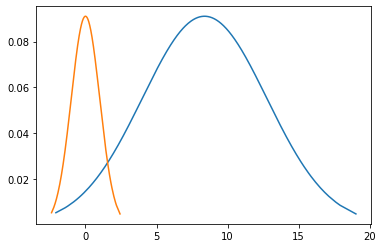

In [5]:
# remove nan values
print('Number of empty values: ' + str((np.isnan(global_temperature_data["LandAverageTemperature"])).sum(0)))
print('Number of non-empty values: ' + str((~np.isnan(global_temperature_data["LandAverageTemperature"])).sum(0)))
clean_data = [x for x in global_temperature_data["LandAverageTemperature"] if ~np.isnan(x)]

# sort data
sorted_data = sorted(clean_data)

# Mean and standard deviation
mean = np.mean(sorted_data, dtype=np.float64)
sd = np.std(sorted_data, dtype=np.float64)

print(mean)

# Probability density function
pdf = stats.norm.pdf(sorted_data, mean, sd)

# Plot distribution
plt.plot(sorted_data, pdf)

# Standardization
standardized_data = (sorted_data - mean) / sd
plt.plot(standardized_data, pdf)

In [6]:
# 95% Konfidenzintervall
# https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
alpha = 0.05                             # significance level = 5%
df = len(sorted_data) - 1                # degress of freedom
t = stats.t.ppf(1 - alpha/2, df)         # t-critical value for 95% CI // two-sided test
n = len(sorted_data)

lower = mean - (t * sd / np.sqrt(n))
upper = mean + (t * sd / np.sqrt(n))

print(lower)
print(upper)

# Mean is not far apart as worlds temperature doesnt change a lot

8.22241862113991
8.527043643011032


b) Wie groß muss der Stichprobenumfang mindestens sein, damit die Breite des 95% Konfidenzintervalls für die Temperatur höchstens 0.3 *C

In [7]:
# Breite bspw. 0.3, da wir dies aus bspw. historischen gelernt haben. 
# Read z-score table at 0.9750 as we do have alpha = 0.05
# 0,3 >= 2 * (sd)/sqrt(n) * z-score
# sqrt(n) * 0,3 >= 2 * (sd) * z-score   || /0,3
# sqrt(n) >= (2 * sd * z-score)/0,3     || square
# n >= np.square((2 * sd * 1,96)/0.3)
width = np.square((2 * sd * 1.96)/0.3)
print(str(width) + " - Messpunkte werden benötigt")
# Source
# https://www.mathelounge.de/550413/wie-gross-muss-der-stichprobenumfang-mindestens-sein

3276.4304442830844 - Messpunkte werden benötigt


c) Wie groß muss das Konfidenzniveau 1 - alpha gewählt werden, damit die Breite des dazu gehörigen Konfidenzintervalls 8°C nicht übberschreitet? Wir gehen von 100 Messpunkten aus!. Begründen Sie in einem Satz, ob ein solches Signifikanzniveau als sinnvoll zu erachten ist!

In [23]:
# Umformen nach 1-alpha (z-tabelle)
# 1 >= 2 * (sd/sqrt(n))*z-score
# 1 - 0.05/2 <= (np.sqrt(3180)/2*sd)
# np.sqrt(3180)/2*sd)
pre_zscore = np.sqrt(100)/(2*sd)
# 1.1413907280422295
zscore = 0.8729
alpha_new = 2 * (1- zscore)
print(alpha_new)
# 0.2542
# Bei α=0,25 würden wir einen Fehler erster Art bei einem aus vier Fällen tolerieren. 
# Dies ist sehr großzügig, wenn wir tatsächlich noch von Signifikanz sprechen wollen. 
# In einem aus vier Fällen würden wir die Nullhypothese zurückweisen, auch wenn sie in Wirklichkeit wahr ist. 
# Allerdings wäre die Wahrscheinlichkeit, einen Fehler zweiter Art zu begehen(die Nullhypothese wird beibehalten, 
# auch wenn in Wirklichkeit die Alternativhypothese gilt) wesentlich geringer. 
# Bei einem Signifikanzniveau von α=0,25 würden wir also eher die Nullhypothese zurückweisen, 
# sowohl wenn sie wahr ist, als auch wenn sie nicht wahr ist – daher sinkt die Wahrscheinlichkeit, einen Fehler 2. Art zu begehen.

0.2542


Signifikanz Test (temperature overall 1750-01-01 - 2015-12-01)

In [9]:
# Null hypothesis — The mean overall temperature is 8.374731132075471
# Alternative hypothesis — The mean overall temperature is greater than 8.374731132075471

# What is the probability that we reach an average temperature of 8.5 (Mean= 8.374731132075471)
stats.ttest_1samp(sorted_data, 8.5)

# P-value of 10,9..% > significance level 5% = not statistically significant // 8.5 is not feaseable
# At what temperature do we receive statistically significant p-value?
stats.ttest_1samp(sorted_data, 8.53)

# Sources
# https://towardsdatascience.com/p-values-explained-by-data-scientist-f40a746cfc8
# https://www.youtube.com/watch?v=dPXBN8ms-cU

Ttest_1sampResult(statistic=-1.9984532188428852, pvalue=0.045752569458540976)

Number of empty values: 0
Number of non-empty values: 852
Mean 8.090578638497652
Standard deviation 4.534761257404447


Ttest_1sampResult(statistic=-2.633788218330889, pvalue=0.008597111535717546)

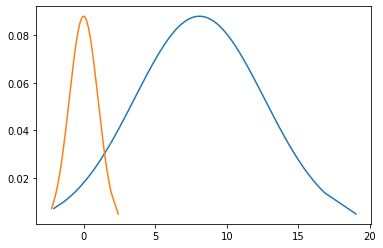

In [15]:
# select relevant data
global_temperature_data['dt'] = pd.to_datetime(global_temperature_data['dt'])
mask = (global_temperature_data['dt'] >= '1760-01-01' ) & (global_temperature_data['dt'] < '1831-01-01')
global_temperature_data_industrialization = global_temperature_data.loc[mask]

# remove nan values
print('Number of empty values: ' + str((np.isnan(global_temperature_data_industrialization["LandAverageTemperature"])).sum(0)))
print('Number of non-empty values: ' + str((~np.isnan(global_temperature_data_industrialization["LandAverageTemperature"])).sum(0)))
clean_data_industrialization = [x for x in global_temperature_data_industrialization["LandAverageTemperature"] if ~np.isnan(x)]

# sort data
sorted_data_industrialization = sorted(clean_data_industrialization)

# Mean and standard deviation
mean_industrialization = np.mean(sorted_data_industrialization, dtype=np.float64)
sd_industralization = np.std(sorted_data_industrialization, dtype=np.float64)
print("Mean " + str(mean_industrialization))
print("Standard deviation " + str(sd_industralization))

# Probability density function
pdf_industrialization = stats.norm.pdf(sorted_data_industrialization, mean_industrialization, sd_industralization)

# Plot distribution
plt.plot(sorted_data_industrialization, pdf_industrialization)

# Standardization
standardized_data_industrialization = (sorted_data_industrialization - mean_industrialization) / sd_industralization
plt.plot(standardized_data_industrialization, pdf_industrialization)

# Null hypothesis — The mean overall temperature is 8.0381183127572
# Alternative hypothesis — The mean overall temperature is greater than 8.0381183127572

# What is the probability that we reach an average temperature of 8.5 (Mean= 8.0381183127572)
stats.ttest_1samp(sorted_data_industrialization, 8.5)

Signifikanz Test (temperature modern age 1945 - 2015)

Number of empty values: 0
Number of non-empty values: 852
Mean 8.955720657276995
Standard deviation 4.1647708039215905


Ttest_1sampResult(statistic=3.192069869795731, pvalue=0.00146442448654915)

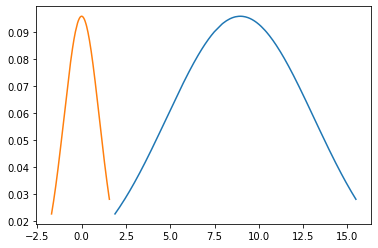

In [20]:
# select relevant data
global_temperature_data['dt'] = pd.to_datetime(global_temperature_data['dt'])
mask = (global_temperature_data['dt'] >= '1945-01-01' ) & (global_temperature_data['dt'] < '2015-12-30')
global_temperature_data_modern = global_temperature_data.loc[mask]

# remove nan values
print('Number of empty values: ' + str((np.isnan(global_temperature_data_modern["LandAverageTemperature"])).sum(0)))
print('Number of non-empty values: ' + str((~np.isnan(global_temperature_data_modern["LandAverageTemperature"])).sum(0)))
clean_data_modern = [x for x in global_temperature_data_modern["LandAverageTemperature"] if ~np.isnan(x)]

# sort data
sorted_data_modern = sorted(clean_data_modern)

# Mean and standard deviation
mean_modern = np.mean(sorted_data_modern, dtype=np.float64)
sd_modern = np.std(sorted_data_modern, dtype=np.float64)
print("Mean " + str(mean_modern))
print("Standard deviation " + str(sd_modern))

# Probability density function
pdf_modern = stats.norm.pdf(sorted_data_modern, mean_modern, sd_modern)

# Plot distribution
plt.plot(sorted_data_modern, pdf_modern)

# Standardization
standardized_data_modern = (sorted_data_modern - mean_modern) / sd_modern
plt.plot(standardized_data_modern, pdf_modern)

# Null hypothesis — The mean overall temperature is 8.0381183127572
# Alternative hypothesis — The mean overall temperature is greater than 8.0381183127572

# What is the probability that we reach an average temperature of 8.5 (Mean= 8.0381183127572)
stats.ttest_1samp(sorted_data_modern, 8.5)